# Set up

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

# Load the data

In [19]:
import os
os.chdir('/Users/alexandrejacqueline/documents/scriptopc/P6')

notes = pd.read_csv('notes.csv')

# Mission 0: Descriction des données

In [5]:
notes.info()
notes.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170 entries, 0 to 169
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   is_genuine    170 non-null    bool   
 1   diagonal      170 non-null    float64
 2   height_left   170 non-null    float64
 3   height_right  170 non-null    float64
 4   margin_low    170 non-null    float64
 5   margin_up     170 non-null    float64
 6   length        170 non-null    float64
dtypes: bool(1), float64(6)
memory usage: 8.3 KB


,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
count,170,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000
unique,2,NaN,NaN,NaN,NaN,NaN,NaN
top,True,NaN,NaN,NaN,NaN,NaN,NaN
freq,100,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,171.940588,104.066353,103.928118,4.612118,3.170412,112.570412
std,NaN,0.305768,0.298185,0.330980,0.702103,0.236361,0.924448
min,NaN,171.040000,103.230000,103.140000,3.540000,2.270000,109.970000
25%,NaN,171.730000,103.842500,103.690000,4.050000,3.012500,111.855000
50%,NaN,171.945000,104.055000,103.950000,4.450000,3.170000,112.845000
75%,NaN,172.137500,104.287500,104.170000,5.127500,3.330000,113.287500


Ces données contiennent les informations de 170 patients billets. On y trouve des informations telles que :

    diagonal ;
    height ;
    margin ;
    length ;
    etc.

La variable is_genuine est la variable qui indique si le billet est True (1) or False (0).

In [21]:
# True=1 / False=0
notes['is_genuine'] = notes['is_genuine'].astype(int)

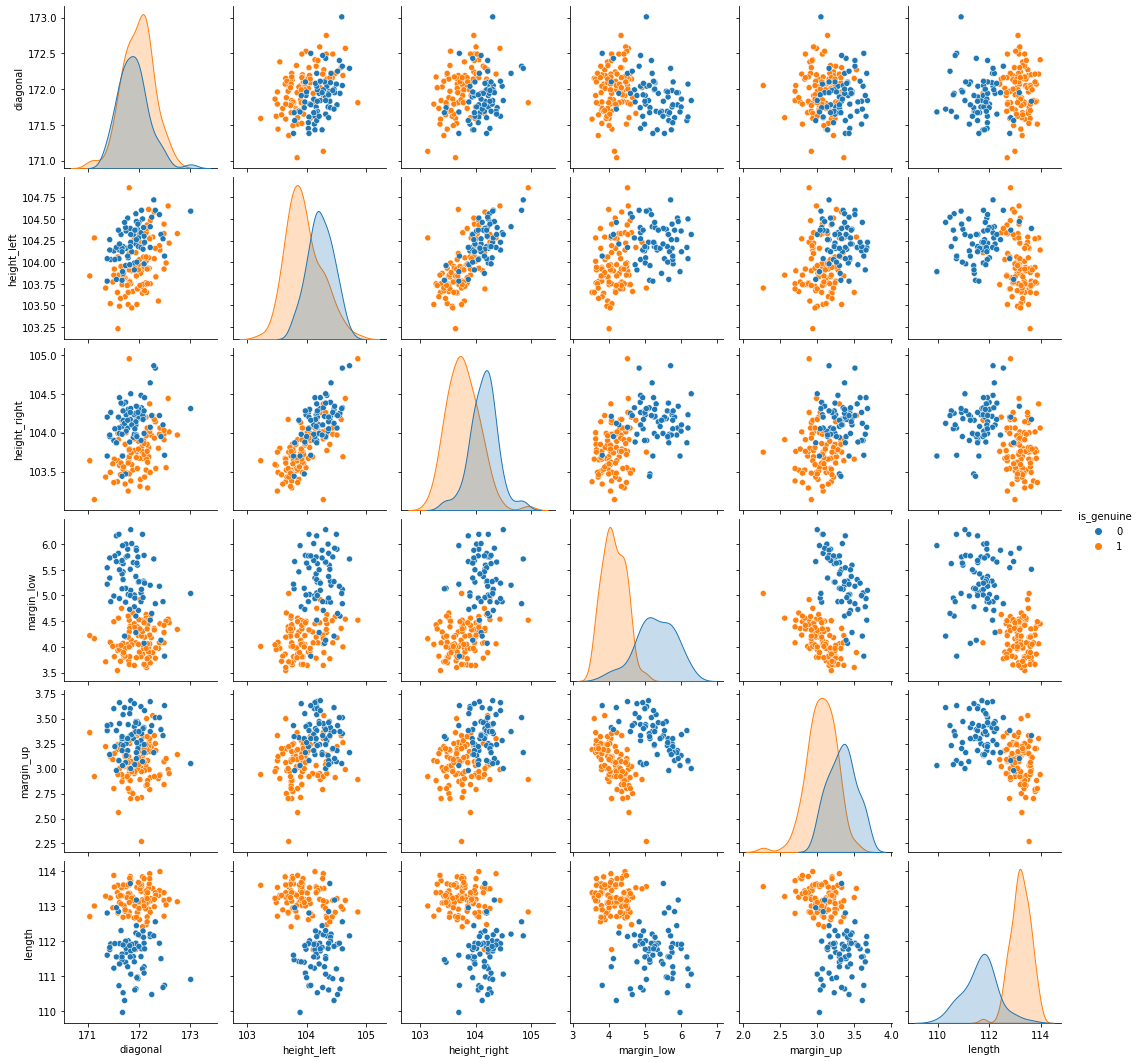

In [7]:
sns.pairplot(data=notes, hue='is_genuine')
#plt.savefig("1.png")

Nous constatons une forte corrélation entre height_left et height_right

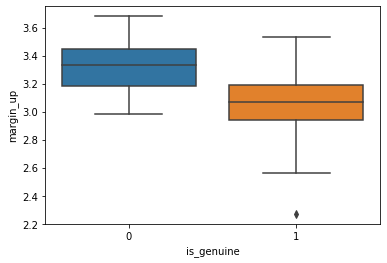

In [8]:
sns.boxplot(data=notes, x='is_genuine', y="margin_up")
#plt.savefig("2_margin_up_blox.png")

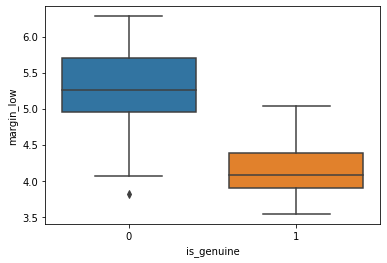

In [9]:
sns.boxplot(data=notes, x='is_genuine', y="margin_low")
#plt.savefig("3_margin_low_blox.png")

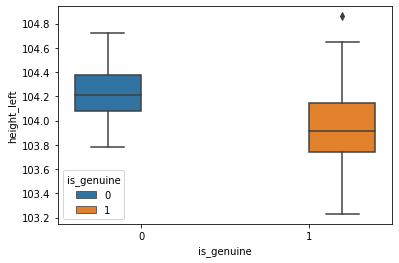

In [10]:
sns.boxplot(data=notes, x='is_genuine', y="height_left",hue='is_genuine')
#plt.savefig("4_height_left_blox.png")

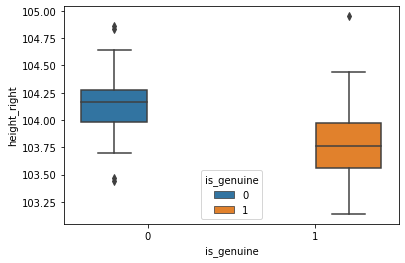

In [11]:
sns.boxplot(data=notes, x='is_genuine', y="height_right",hue='is_genuine')
#plt.savefig("5_height_right_blox.png")

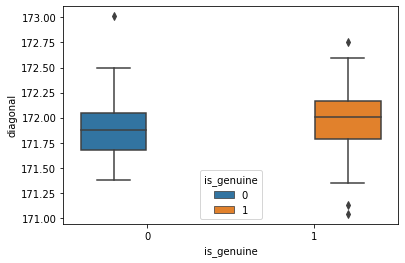

In [12]:
sns.boxplot(data=notes, x='is_genuine', y="diagonal",hue='is_genuine')
#plt.savefig("5_height_right_blox.png")

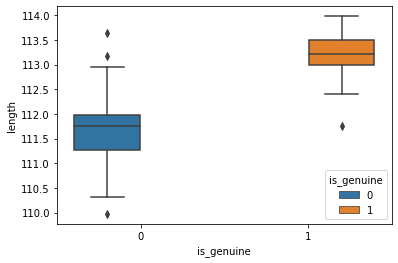

In [14]:
sns.boxplot(data=notes, x='is_genuine', y="length",hue='is_genuine')

In [13]:
notes.head(1)

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,1,171.81,104.86,104.95,4.52,2.89,112.83


# Bivarié

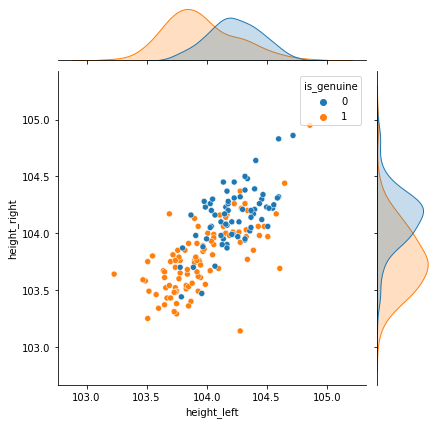

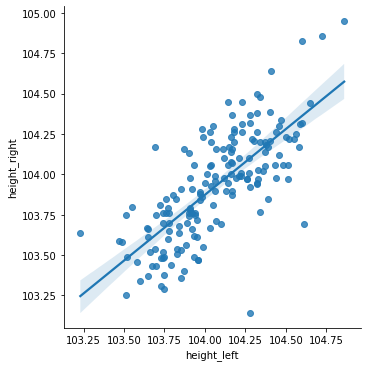

In [14]:
sns.jointplot(data=notes, x="height_left", y="height_right",hue='is_genuine')
sns.lmplot(data=notes, x="height_left", y="height_right")
#plt.savefig("6_height_l_vs_height_right.png")

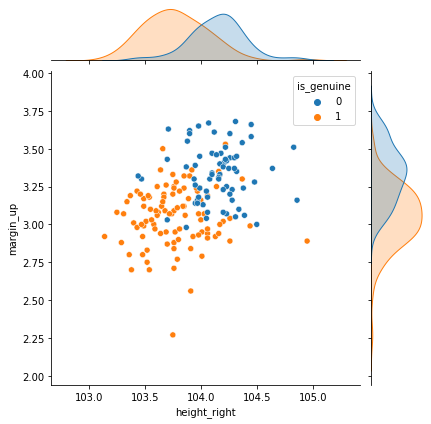

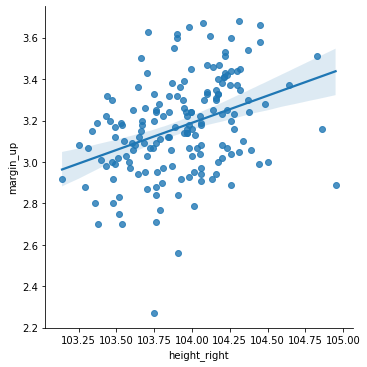

In [15]:
sns.jointplot(data=notes, x="height_right", y="margin_up",hue='is_genuine')
sns.lmplot(data=notes, x="height_right", y="margin_up")
#plt.savefig("7_margin_up_vs_height_right.png")

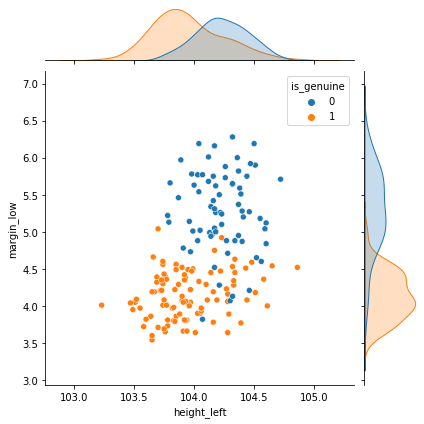

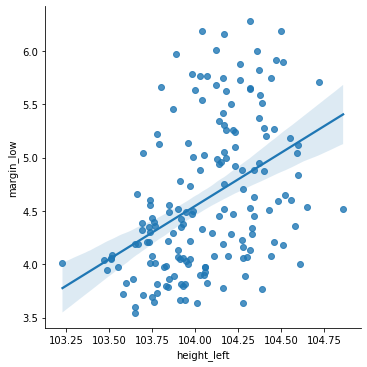

In [16]:
sns.jointplot(data=notes, x="height_left", y="margin_low",hue='is_genuine')
sns.lmplot(data=notes, x="height_left", y="margin_low")
#plt.savefig("8_margin_low_vs_height_left.png")

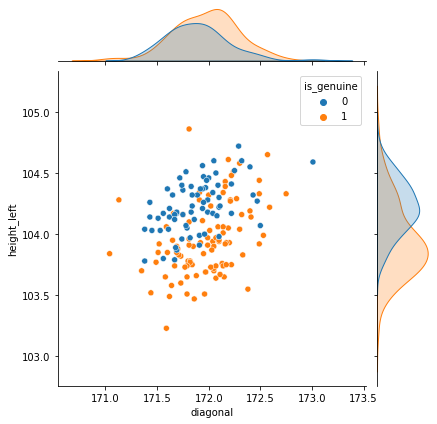

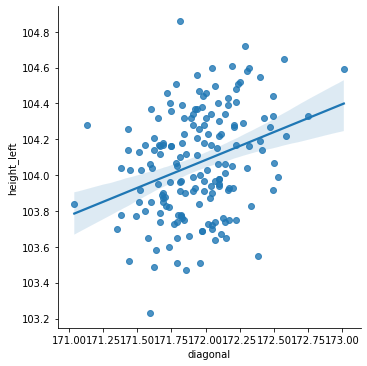

In [17]:
sns.jointplot(data=notes, x="diagonal", y="height_left",hue='is_genuine')
sns.lmplot(data=notes, x="diagonal", y="height_left")
#plt.savefig("9_diagonal_vs_height_left.png")

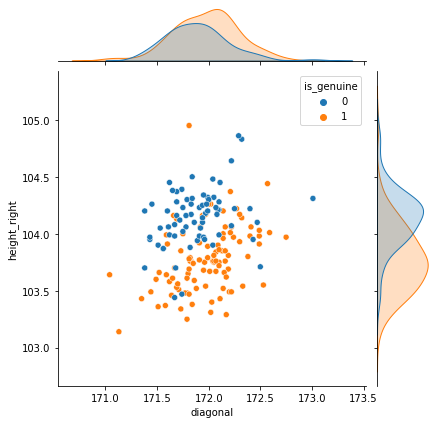

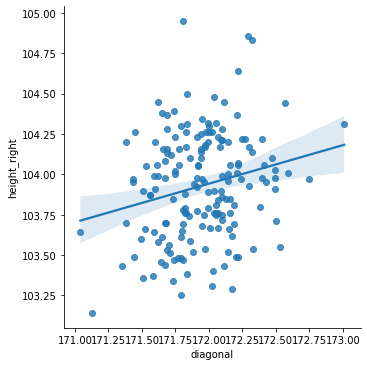

In [18]:
sns.jointplot(data=notes, x="diagonal", y="height_right",hue='is_genuine')
sns.lmplot(data=notes, x="diagonal", y="height_right")
#plt.savefig("10_diagonal_vs_height_right.png")

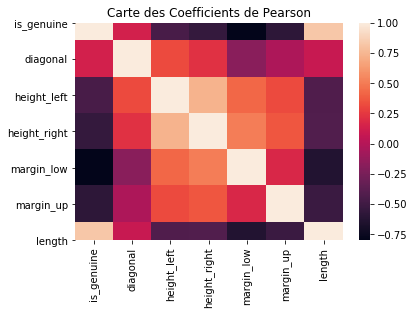

In [19]:
sns.heatmap(notes.corr()).set_title('Carte des Coefficients de Pearson');
#Interpretation ??
#plt.savefig("11_heatmap.png")

# Analyse des distributions

In [20]:
testUniva = notes[['diagonal','height_left','height_right','margin_low','margin_up','length']]


/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


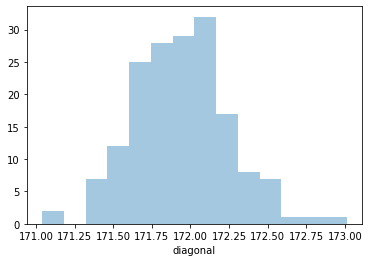

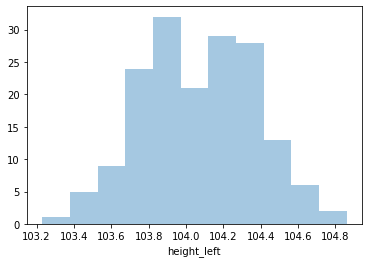

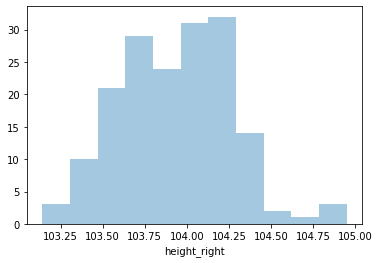

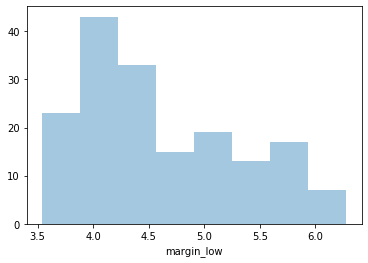

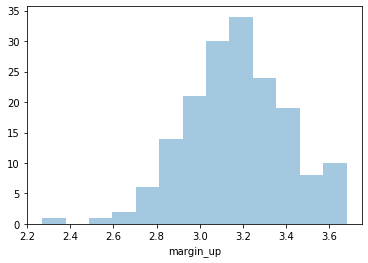

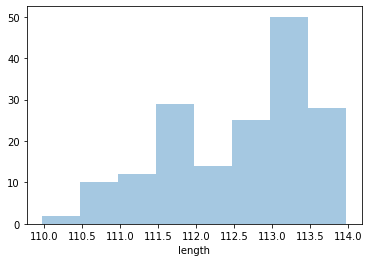

In [21]:
for i, col in enumerate(testUniva.columns):
    plt.figure(i)
    sns.distplot(testUniva[col], kde=False )
    
#plt.savefig("13_ALL_VAR_distrib.png")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9b86a59690>]],
      dtype=object)

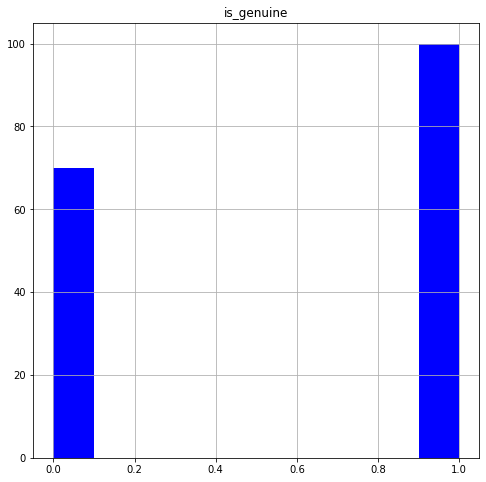

In [22]:
notes.hist(column='is_genuine', figsize=(8,8), color='blue')
#plt.savefig("12_is_distrib.png")

In [27]:
# Pourcentage d'achat
# True/False to 1/0
fake = len(notes[notes['is_genuine']==0])
reel = len(notes[notes['is_genuine']==1])
pct_of_no_sub = fake/(fake+reel)
print("Pourcentage de faux billets est de", round(pct_of_no_sub*100),'%')

Pourcentage de faux billets est de 41 %
